In [1]:
import numpy as np
import pandas as pd
from meshparty import meshwork, trimesh_vtk

In [4]:
CellTypes = pd.read_csv('EM_InhibColumn_Predicted_MET_Labels_6_24_22.csv')
df = pd.DataFrame(CellTypes, columns=['Unnamed: 0', 'id', 'predicted_MET-type Label', 'probability'])
df.reset_index(drop=True).to_feather("CellTypes.feather")

In [7]:
CellIDs = pd.read_feather('inhibitory_dataframe.feather')
df1 = pd.DataFrame(CellIDs, columns=['id', 'valid', 'classification_system', 'cell_type_manual', 'pt_supervoxel_id', 'pt_root_id', 'pt_position', 'soma_id', 'soma_depth'])
df1.reset_index(drop=True).to_feather("CellIDs.feather")

In [11]:
CellTypesWithIDs = pd.merge(CellTypes, CellIDs, left_on = 'id', right_on = 'soma_id', how = "left")
df2 = pd.DataFrame(CellTypesWithIDs, columns=['Unnamed: 0', 'id_x', 'predicted_MET-type Label', 'probability', 'id_y', 'valid', 'classification_system', 'cell_type_manual', 'pt_supervoxel_id', 'pt_root_id', 'pt_position', 'soma_id', 'soma_depth'])
df2.reset_index(drop=True).to_feather("CellTypesWithIDs.feather")

In [16]:
DataMatrix = pd.read_feather('data_frame.feather')
df3 = pd.DataFrame(DataMatrix, columns=['Nrn 1', 'Nrn 2', '# Vertices', '# Vertices w/o axons', 'Min Distance', 'Index Value', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates', '# Interactions < 5 Microns'])

In [20]:
DataMatrixCellType = pd.merge(df3, CellTypesWithIDs, left_on = 'Seg ID Nrn 1', right_on = 'pt_root_id', how = 'left')
df4 = pd.DataFrame(DataMatrixCellType, columns=['Nrn 1', 'Nrn 2', '# Vertices', '# Vertices w/o axons', 'Min Distance', 'Index Value', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates	', '# Interactions < 5 Microns', 'Unnamed: 0', 'id_x', 'predicted_MET-type Label', 'probability', 'id_y', 'valid', 'classification_system', 'cell_type_manual', 'pt_supervoxel_id', 'pt_root_id', 'pt_position', 'soma_id', 'soma_depth'])
df4.reset_index(drop=True).to_feather("DataMatrixCellType.feather")

In [104]:
DataMatrixCellTypeAll = pd.merge(DataMatrixCellType, CellTypesWithIDs, left_on = 'Seg ID Nrn 2', right_on = 'pt_root_id', how = 'left')
df5 = pd.DataFrame(DataMatrixCellTypeAll, columns=['Nrn 1', 'Nrn 2', '# Vertices', '# Vertices w/o axons', 'Min Distance', 'Index Value', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates	', '# Interactions < 5 Microns', 'Unnamed: 0', 'id_x', 'predicted_MET-type Label', 'probability', 'id_y', 'valid', 'classification_system', 'cell_type_manual', 'pt_supervoxel_id', 'pt_root_id', 'pt_position', 'soma_id', 'soma_depth'])
df5.reset_index(drop=True).to_feather("DataMatrixCellTypeAll.feather")

In [110]:
# Final Dataset
DataMatrixCellTypeAll1 = DataMatrixCellTypeAll[["Nrn 1", "Nrn 2", "Min Distance", "Seg ID Nrn 1", "Seg ID Nrn 2", "Coordinates", "# Interactions < 5 Microns", "predicted_MET-type Label_x", "predicted_MET-type Label_y"]]    
df6 = pd.DataFrame(DataMatrixCellTypeAll1, columns=['Nrn 1', 'Nrn 2', 'Min Distance', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates', '# Interactions < 5 Microns', 'predicted_MET-type Label_x', 'predicted_MET-type Label_y'])
df6.reset_index(drop=True).to_feather("FinalDataset.feather")

In [242]:
# Create a new Dataframe that includes current neuron interactions plus their inverse interactions
# Example: neuron 0 with neuron 1 AND neuron 1 with neuron 0
CellTypeAll2 = DataMatrixCellTypeAll1.to_numpy() # Change DataMatrixCellTypeAll1 from dataframe to array
r, c = 9, len(CellTypeAll2)*2 
CellTypeAll3 = [[0 for x in range(r)] for y in range(c)]
i = 0
j = 0
# print(type(CellTypeAll1))
# print(type(CellTypeAll2))
# print(CellTypeAll1.iloc[0])
while i < len(DataMatrixCellTypeAll2):
    CellTypeAll3[j] = CellTypeAll2[i]
    j += 1
    CellTypeAll3[j][0] = CellTypeAll2[i][1]
    CellTypeAll3[j][1] = CellTypeAll2[i][0]
    CellTypeAll3[j][2] = CellTypeAll2[i][2]
    CellTypeAll3[j][3] = CellTypeAll2[i][4]
    CellTypeAll3[j][4] = CellTypeAll2[i][3]
    CellTypeAll3[j][5] = CellTypeAll2[i][5]
    CellTypeAll3[j][6] = CellTypeAll2[i][6]
    CellTypeAll3[j][7] = CellTypeAll2[i][8]
    CellTypeAll3[j][8] = CellTypeAll2[i][7]
    j += 1
    i += 1  
print(len(CellTypeAll3))

26732


In [246]:
# Convert CellTypeAll3 array into df6 pandas Dataframe and feather file 
df6 = pd.DataFrame(CellTypeAll3, columns=['Nrn 1', 'Nrn 2', 'Min Distance', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates', '# Interactions < 5 Microns', 'predicted_MET-type Label_x', 'predicted_MET-type Label_y'])
df6.reset_index(drop=True).to_feather("FinalDataset1.feather")

In [351]:
# Find the average number of interactions between each cell type
NUMFILES = int(164) # This is the number of neuron files
SUM1TONUMFILES = int(NUMFILES*(NUMFILES-1)/2) # This is the sum of numbers of 1 and the number of files; this represents the number of unique dendrodendritic interactions
CELLTYPEPAIRNUM = 206 # This is the number of unique cell pair types

i = 0
while i < SUM1TONUMFILES:
    if str(CellTypeAll2[i][7]) > str(CellTypeAll2[i][8]): # if cell type 1 > cell type 2 i.e. alphabetically higher, then switch them
        temp = CellTypeAll2[i][0]
        CellTypeAll2[i][0] = CellTypeAll2[i][1]
        CellTypeAll2[i][1] = temp
        temp = CellTypeAll2[i][7]
        CellTypeAll2[i][7] = CellTypeAll2[i][8]
        CellTypeAll2[i][8] = temp
    i += 1
df7 = pd.DataFrame(CellTypeAll2, columns=['Nrn 1', 'Nrn 2', 'Min Distance', 'Seg ID Nrn 1', 'Seg ID Nrn 2', 'Coordinates', '# Interactions < 5 Microns', 'predicted_MET-type Label_x', 'predicted_MET-type Label_y'])

# Sort the Dataframe by cell type of Nrn 1 and cell type of Nrn 2
SortedbyCellType = df7.sort_values(by=['predicted_MET-type Label_x', 'predicted_MET-type Label_y'])
# Convert to an array
SortedCellTypeArray = SortedbyCellType.to_numpy()
# print(SortedCellTypeArray)

# Create an array that will hold the cell data types and their average number of interactions; initialize all entries to 0
# Array with 5 columns: cell type 1, cell type 2, num_interactions, sum_interactions, average
r1, c1 = 5, CELLTYPEPAIRNUM 
CellTypeInteractions = [[0 for x in range(r1)] for y in range(c1)]

# Go through this sorted dataframe one by one to count the number of interactions between each pair of cell types
i = 0
k = 0
while i < SUM1TONUMFILES:
    # Skip if the number of interactions < 5 microns between the neuron pair is 0
    if SortedCellTypeArray[i][6] == 0:
        i += 1
        continue
    # Skip if one of the neurons has an undefined type of NaN 
    if ((len(str(SortedCellTypeArray[i][7])) == 3) or (len(str(SortedCellTypeArray[i][8])) == 3)): # To ensure the cell types are not empty (nan)
        # print("SortedCellTypeArray[i][7] is ", SortedCellTypeArray[i][7])
        # print("SortedCellTypeArray[i][8] is ", SortedCellTypeArray[i][8])
        # print("i = ", i)
        i += 1
        continue
    # First neuron pair to have a non-zero number of interactions < 5 microns
    if (k == 0 and CellTypeInteractions[k][0] == 0):
        CellTypeInteractions[k][0] = SortedCellTypeArray[i][7]   # set to Neuron 1 cell type
        CellTypeInteractions[k][1] = SortedCellTypeArray[i][8]   # set to Neuron 2 cell type
        CellTypeInteractions[k][2] += 1  # increment number of interactions
        CellTypeInteractions[k][3] += SortedCellTypeArray[i][6] # add to running sum number of interactions for this pair of cell types
        i += 1
    # Check if neuron pair rows has already been setup in CellTypeInteractions
    # If so, then increment both num_ and sum_interactions
    elif ((CellTypeInteractions[k][0] == SortedCellTypeArray[i][7]) and (CellTypeInteractions[k][1] == SortedCellTypeArray[i][8])):
    # ((str(CellTypeInteractions[k][0]) == str(SortedCellTypeArray[i][7])) & (str(CellTypeInteractions[k][1]) == str(SortedCellTypeArray[i][8]))):
        # print("CellTypeInteractions[k][0] is ", CellTypeInteractions[k][0])
        # print("SortedCellTypeArray[i][7] is ", SortedCellTypeArray[i][7])
        CellTypeInteractions[k][2] += 1  # increment number of interactions
        CellTypeInteractions[k][3] += SortedCellTypeArray[i][6] # add to running sum number of interactions for this pair of cell types
        i += 1
    else:
        # Otherwise, add a new row in CellTypeInteractions for new neuron pair with non-zero interactions < 5 microns
        k += 1
        CellTypeInteractions[k][0] = SortedCellTypeArray[i][7]   # set to Neuron 1 cell type
        CellTypeInteractions[k][1] = SortedCellTypeArray[i][8]   # set to Neuron 2 cell type
        CellTypeInteractions[k][2] += 1  # increment number of interactions
        CellTypeInteractions[k][3] += SortedCellTypeArray[i][6] # add to running sum number of interactions for this pair of cell types
        # print("*********")
        i += 1
print("k = ", k)
# Compute the average for each pair of cell types
i = 0 
while i <= k:
    if CellTypeInteractions[i][2] != 0:
        CellTypeInteractions[i][4] = CellTypeInteractions[i][3]/CellTypeInteractions[i][2]
    # print(CellTypeInteractions[i])
    i += 1

# Convert array to dataframe
df8 = pd.DataFrame(CellTypeInteractions, columns=['Cell Type 1', 'Cell Type 2', 'num_interactions', 'sum_interactions', 'Average'])
df8

k =  199


,Cell Type 1,Cell Type 2,num_interactions,sum_interactions,Average
0,Lamp5-MET-1,Lamp5-MET-1,223,16521,74.085202
1,Lamp5-MET-1,Pvalb-MET-1,1,16,16.000000
2,Lamp5-MET-1,Pvalb-MET-2,26,797,30.653846
3,Lamp5-MET-1,Pvalb-MET-3,8,693,86.625000
4,Lamp5-MET-1,Pvalb-MET-4,405,29136,71.940741
5,Lamp5-MET-1,Sncg-MET-1,15,650,43.333333
6,Lamp5-MET-1,Sst-MET-1,6,380,63.333333
7,Lamp5-MET-1,Sst-MET-10,13,1224,94.153846
8,Lamp5-MET-1,Sst-MET-12,48,2752,57.333333
9,Lamp5-MET-1,Sst-MET-3,198,16904,85.373737


In [347]:
# Create a new Dataframe that includes current neuron cell type interactions plus their inverse interactions
# Example: Cell Type 1 with Cell Type 2 AND Cell Type 2 with Cell Type 1
r2, c2 = 5, len(CellTypeInteractions)*2 
CellTypeInteractionsAll = [[0 for x in range(r2)] for y in range(c2)]
i = 0
j = 0
while i < len(CellTypeInteractions):
    CellTypeInteractionsAll[j] = CellTypeInteractions[i]
    j += 1
    CellTypeInteractionsAll[j][0] = CellTypeInteractions[i][1]
    CellTypeInteractionsAll[j][1] = CellTypeInteractions[i][0]
    CellTypeInteractionsAll[j][2] = CellTypeInteractions[i][2]
    CellTypeInteractionsAll[j][3] = CellTypeInteractions[i][3]
    CellTypeInteractionsAll[j][4] = CellTypeInteractions[i][4]
    j += 1
    i += 1  
print(len(CellTypeInteractionsAll))

# Convert array CellTypeInteractionsAll to Dataframe and feather file
df7 = pd.DataFrame(CellTypeInteractionsAll, columns=['Cell Type 1', 'Cell Type 2', 'num_interactions', 'sum_interactions', 'Average'])
# df7.reset_index(drop=True).to_feather("CellTypeInteractionsAll.feather")
df7

412


,Cell Type 1,Cell Type 2,num_interactions,sum_interactions,Average
0,Lamp5-MET-1,Lamp5-MET-1,223,16521,74.085202
1,Lamp5-MET-1,Lamp5-MET-1,223,16521,74.085202
2,Lamp5-MET-1,Pvalb-MET-1,1,16,16.000000
3,Pvalb-MET-1,Lamp5-MET-1,1,16,16.000000
4,Lamp5-MET-1,Pvalb-MET-2,26,797,30.653846
5,Pvalb-MET-2,Lamp5-MET-1,26,797,30.653846
6,Lamp5-MET-1,Pvalb-MET-3,8,693,86.625000
7,Pvalb-MET-3,Lamp5-MET-1,8,693,86.625000
8,Lamp5-MET-1,Pvalb-MET-4,405,29136,71.940741
9,Pvalb-MET-4,Lamp5-MET-1,405,29136,71.940741


In [291]:
# Pivot plot displays average number of interaction by cell type
df7.pivot_table(
    index="Cell Type 1",
    columns="Cell Type 2",
    values="Average",
    fill_value=0
    )

Cell Type 2,Lamp5-MET-1,Pvalb-MET-1,Pvalb-MET-2,Pvalb-MET-3,Pvalb-MET-4,Sncg-MET-1,Sst-MET-1,Sst-MET-10,Sst-MET-12,Sst-MET-3,Sst-MET-4,Sst-MET-5,Sst-MET-6,Sst-MET-7,Sst-MET-8,Sst-MET-9,Vip-MET-1,Vip-MET-2,Vip-MET-4,Vip-MET-5
Cell Type 1,,,,,,,,,,,,,,,,,,,,
Lamp5-MET-1,74.085202,16.000000,30.653846,86.625000,71.940741,43.333333,63.333333,94.153846,57.333333,85.373737,45.333333,119.500000,86.684211,39.625000,67.225225,62.560000,39.640288,51.758065,39.623529,85.934426
Pvalb-MET-1,16.000000,0.000000,29.000000,8.000000,10.750000,71.000000,17.000000,21.000000,25.642857,26.000000,23.333333,15.000000,18.250000,0.000000,13.333333,25.333333,0.000000,18.000000,12.600000,3.000000
Pvalb-MET-2,30.653846,29.000000,90.571429,36.500000,25.333333,70.818182,68.277778,143.185185,52.230769,34.885714,42.347826,52.833333,54.728814,62.000000,37.312500,65.125000,6.750000,18.058824,86.033333,7.833333
Pvalb-MET-3,86.625000,8.000000,36.500000,0.000000,67.277778,47.000000,71.000000,54.250000,49.466667,76.625000,117.750000,100.000000,59.142857,24.000000,75.333333,72.666667,14.333333,57.000000,119.000000,79.000000
Pvalb-MET-4,71.940741,10.750000,25.333333,67.277778,78.615079,40.965517,33.833333,39.333333,32.775194,83.449580,54.304348,43.000000,28.120000,28.722222,81.877660,35.447368,40.884892,47.484375,55.404255,53.793103
Sncg-MET-1,43.333333,71.000000,70.818182,47.000000,40.965517,0.000000,32.666667,112.800000,53.115385,63.500000,52.375000,91.500000,81.500000,20.500000,62.200000,41.636364,31.000000,30.000000,70.444444,34.000000
Sst-MET-1,63.333333,17.000000,68.277778,71.000000,33.833333,32.666667,36.333333,98.090909,48.170213,44.428571,59.000000,35.000000,34.705882,32.333333,36.888889,78.916667,13.000000,31.000000,47.500000,23.000000
Sst-MET-10,94.153846,21.000000,143.185185,54.250000,39.333333,112.800000,98.090909,157.666667,83.230769,59.562500,88.583333,88.000000,116.633333,118.666667,52.187500,87.360000,0.000000,58.636364,133.666667,44.333333
Sst-MET-12,57.333333,25.642857,52.230769,49.466667,32.775194,53.115385,48.170213,83.230769,39.351515,48.543860,46.245283,55.850000,56.867133,26.333333,45.358209,52.538462,14.500000,37.421053,50.294872,22.142857


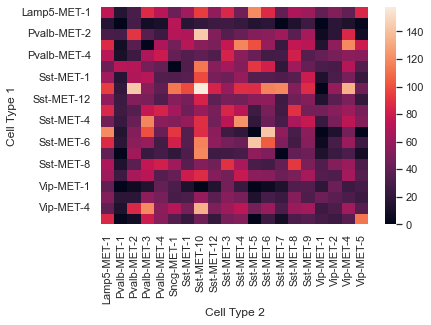

In [289]:
# Pivot plot by cell type by average interactions less than 5 microns 
import seaborn as sns

pivot = df7.pivot_table(
    index="Cell Type 1",
    columns="Cell Type 2",
    values="Average",
    fill_value=0
    )
df = sns.heatmap(pivot)

In [212]:
# df6.loc[df6['Seg ID Nrn 1'] == 864691135013235606] # & [df6['Seg ID Nrn 2'] == 864691135012644086]

In [213]:
# Pivot plot by individual Seg IDs // NOT sorted by cell type
# df6.pivot_table(
    # index="Seg ID Nrn 1",
    # columns="Seg ID Nrn 2",
    # values="# Interactions < 5 Microns",
    # fill_value=0
    # )

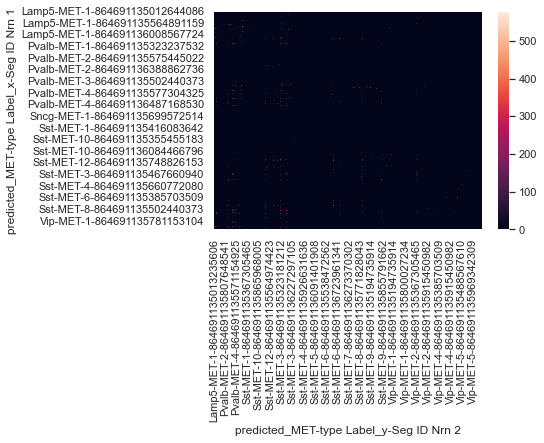

In [304]:
# Pivot plot by cell type and individual seg ID
pivot = df6.pivot_table(
    index=["predicted_MET-type Label_x", "Seg ID Nrn 1"],
    columns=["predicted_MET-type Label_y", "Seg ID Nrn 2"],
    values="# Interactions < 5 Microns",
    fill_value=0
    )
df = sns.heatmap(pivot)

In [355]:
Subclasses = ['Lamp5', 'Pvalb', 'Sncg', 'Sst', 'Vip']
Number = [16521, 24953, 0, 87663, 5308]

subclass_df = pd.DataFrame(
    {
        'Cell Type 1': Subclasses,
        'Cell Type 2': Subclasses,
        'num_Interactions': Number,
    }, columns=['Cell Type 1', 'Cell Type 2', 'num_Interactions']
)
subclass_df

,Cell Type 1,Cell Type 2,num_Interactions
0,Lamp5,Lamp5,16521
1,Pvalb,Pvalb,24953
2,Sncg,Sncg,0
3,Sst,Sst,87663
4,Vip,Vip,5308


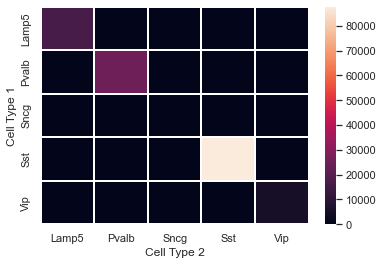

In [368]:
pivot = subclass_df.pivot_table(
    index="Cell Type 1",
    columns="Cell Type 2",
    values="num_Interactions",
    fill_value=0
    )

df = sns.heatmap(pivot, linewidths=2)